<a href="https://colab.research.google.com/github/Feven-Belay/DataScience/blob/main/Homework_2A_FevenAraya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding: Golf Play Decision
In many outdoor activities, weather conditions play a crucial role in decision-making processes. For golf enthusiasts and course managers, deciding whether the day's conditions are conducive to playing golf is essential. This decision affects not only players' experiences but also the management of resources at golf courses.

# Data Understanding
The dataset consists of historical records indicating whether golf was played under specific weather conditions. Each record includes:

1. Outlook: The general weather outlook (sunny, overcast, rain).
2. Temperature: The temperature in Fahrenheit.
3. Humidity: The humidity level as a percentage.
4. Wind: A boolean indicating the presence of strong wind.
This data will be used to train a predictive model to assist in decision-making.



# Manually extracted rules for predicting whether to 'Play' or not are as follows:

1. If the outlook is overcast, then the decision is yes, play regardless of other conditions.
2. If the outlook is rainy and it is not windy, then play.
3. If the outlook is rainy and it is windy, then do not play.
4. If the outlook is sunny and the humidity is greater than 77.5, then do not play.
5. If the outlook is sunny and the humidity is less than or equal to 77.5, then play.

# Data Preparation

In [ ]:
# Importing neccesary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [ ]:
# read dataset into pandas framework
data = pd.read_csv('/content/homework2a.csv')

Exploratory analysis

In [ ]:
# Preview the first 5 lines of the data
data.head()

,Row No.,Play,Outlook,Temperature,Humidity,Wind
0,1,no,sunny,85,85,False
1,2,no,sunny,80,90,True
2,3,yes,overcast,83,78,False
3,4,yes,rain,70,96,False
4,5,yes,rain,68,80,False


In [ ]:
# Remove the "Row No." column as it seems of not importance
data = data.drop("Row No.", axis=1)

In [ ]:
# Finding the number of rows and columns of the dataset
data.shape

(14, 5)

In [ ]:
# Finding the datatypes of each column
data.dtypes

Play           object
Outlook        object
Temperature     int64
Humidity        int64
Wind             bool
dtype: object

In [ ]:
data.isnull().sum()

Play           0
Outlook        0
Temperature    0
Humidity       0
Wind           0
dtype: int64

In [ ]:
#View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Play         14 non-null     object
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     int64 
 3   Humidity     14 non-null     int64 
 4   Wind         14 non-null     bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


In [ ]:
data.describe()

,Temperature,Humidity
count,14.000000,14.000000
mean,73.571429,80.285714
std,6.571667,9.840486
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,80.000000
75%,78.750000,88.750000
max,85.000000,96.000000


In [ ]:
data.Play.value_counts()

yes    9
no     5
Name: Play, dtype: int64

In [ ]:
# Duplicate Check
data.duplicated().sum()

0

In [ ]:
df = pd.DataFrame(data)

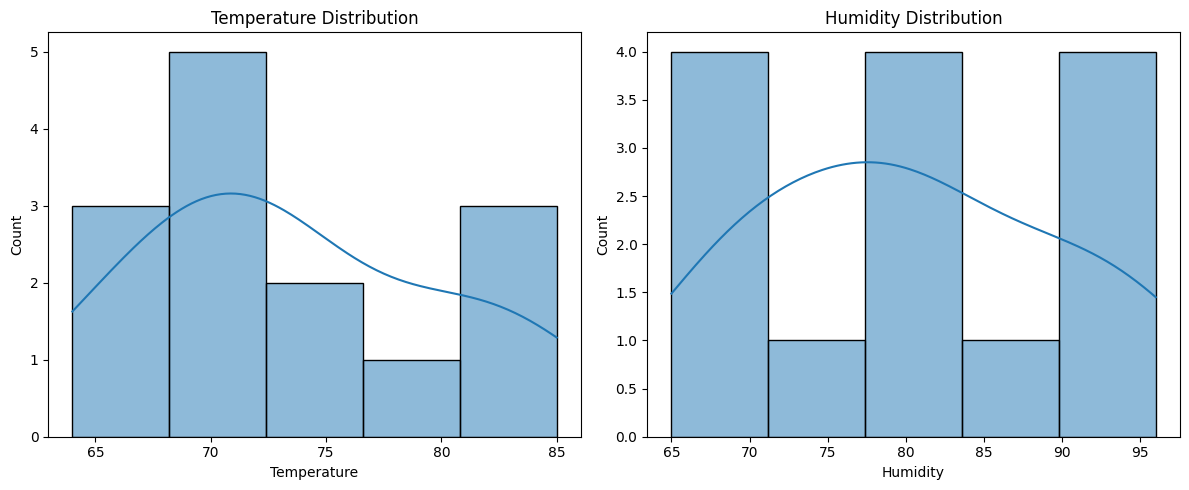

In [ ]:
# Histogram of Temperature and Humidity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Humidity'], kde=True)
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()


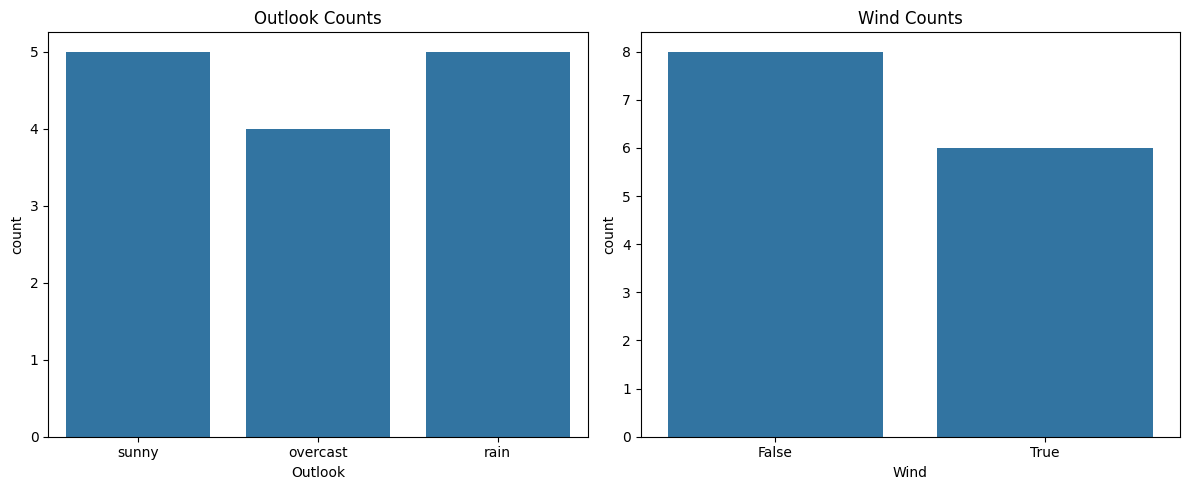

In [ ]:

# Count plot for categorical variables: Outlook and Wind
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Outlook', data=df)
plt.title('Outlook Counts')

plt.subplot(1, 2, 2)
sns.countplot(x='Wind', data=df)
plt.title('Wind Counts')
plt.tight_layout()
plt.show()


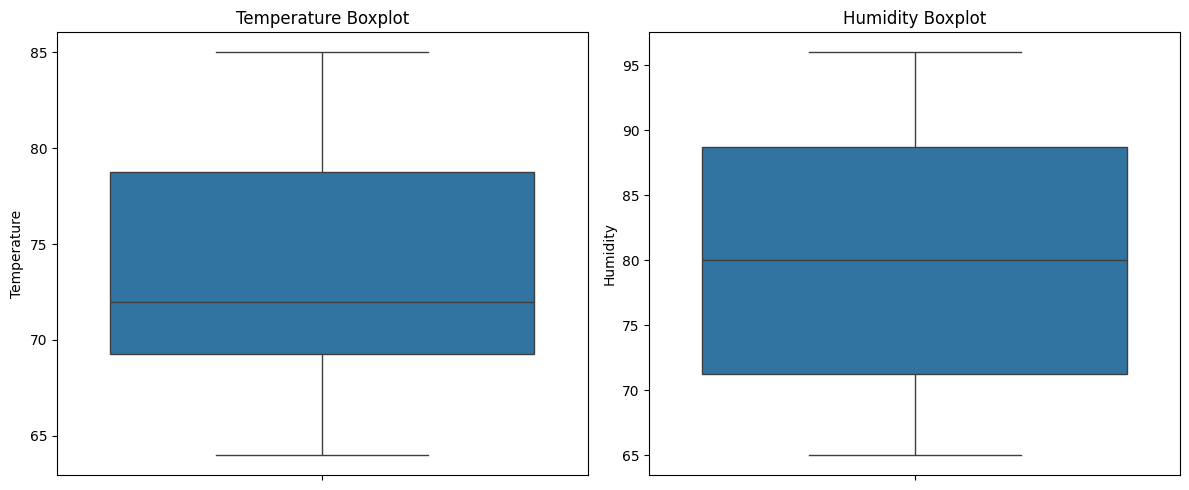

In [ ]:

# Boxplot for Temperature and Humidity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Temperature', data=df)
plt.title('Temperature Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y='Humidity', data=df)
plt.title('Humidity Boxplot')
plt.tight_layout()
plt.show()


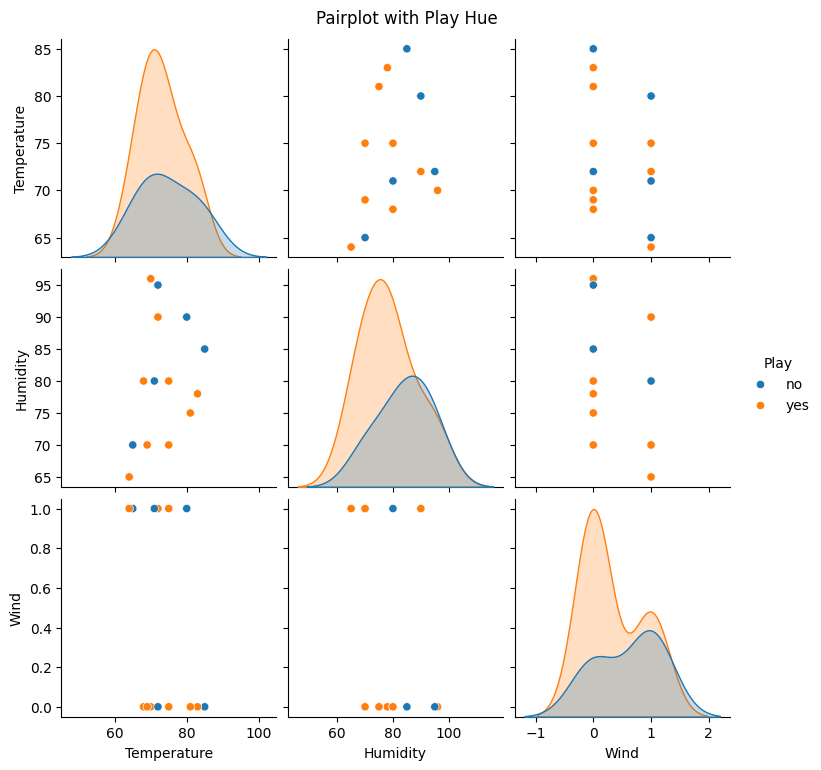

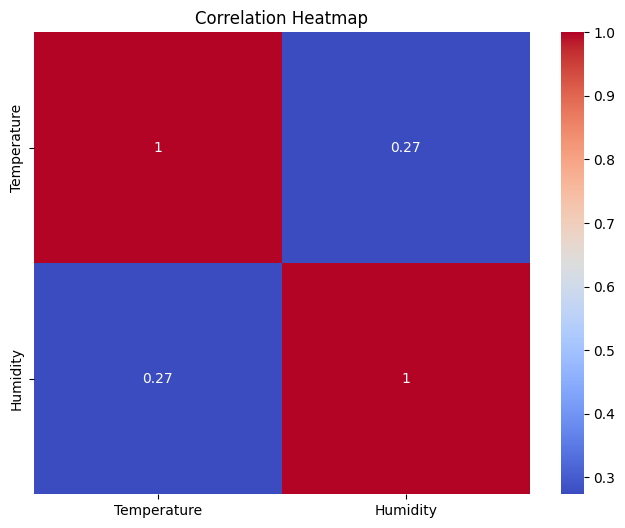

In [ ]:
# Pairplot for all features
sns.pairplot( df, hue='Play')
plt.suptitle('Pairplot with Play Hue', y=1.02)  # Adjust title position
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Temperature', 'Humidity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Encoding categorical data
df['Outlook'] = df['Outlook'].astype('category').cat.codes
df['Wind'] = df['Wind'].astype('category').cat.codes

In [ ]:
df.head()

,Play,Outlook,Temperature,Humidity,Wind
0,no,2,85,85,0
1,no,2,80,90,1
2,yes,0,83,78,0
3,yes,1,70,96,0
4,yes,1,68,80,0


# Decision Tree Classifier

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Play', axis=1)
y = df['Play']


In [ ]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)


In [ ]:
# Fit the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Predict the test set results
y_pred = dt_classifier.predict(X_test)

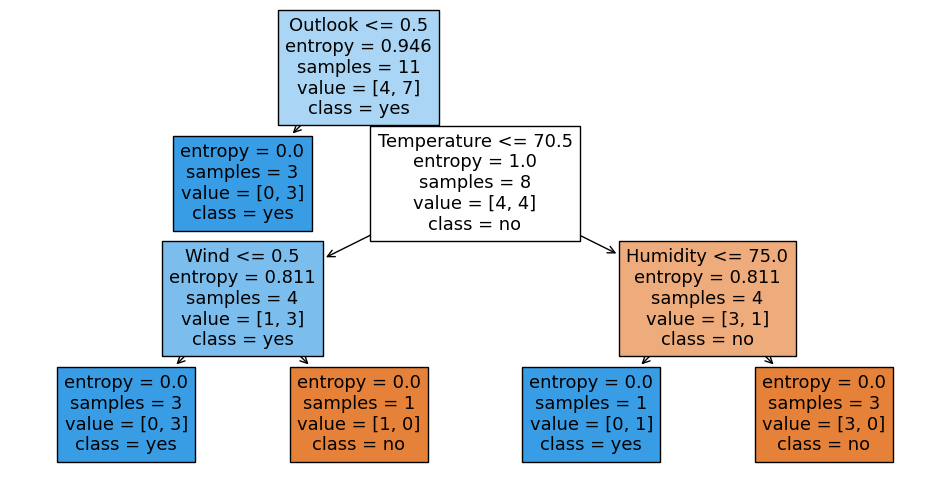

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(12,6))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()




# Extract rules from decision tree for comparison with manually extracted rules
The decision tree diagram provided gives us a clear set of rules based on the features 'Outlook', 'Temperature', 'Humidity', and 'Windy'. Here are the rules extracted from the decision tree:

1. If 'Outlook' is overcast (Outlook <= 0.5), then Play is 'yes'.
2. If 'Outlook' is not overcast (Outlook > 0.5), then:
3. If 'Temperature' is less than or equal to 70.5, Play is 'no'.
4. If 'Temperature' is greater than 70.5, then:
5. If 'Humidity' is less than or equal to 75.0, Play is 'no'.
6. If 'Humidity' is greater than 75.0, Play is 'yes'.
7. If 'Outlook' is not overcast and 'Temperature' is less than or equal to 70.5:
8. If 'Wind' is false (Wind <= 0.5), Play is 'yes'.
9. If 'Wind' is true (Wind > 0.5), Play is 'no'.

# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6666666666666666


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [1 1]]
              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

